In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
import numpy as np

from shapely.affinity import translate
from shapely.affinity import rotate
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import LineString

from shapely.wkt import dumps
from shapely.wkt import loads

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

# Cairo tiles
The one true tiling. Provides 4 directionally distinguishable elements... and also can be read two different ways (intersecting hexagons runninng in two orthogonal directions).

In [9]:
d = 500
tile_unit = TileUnit(spacing = d, crs = 2193)

<AxesSubplot:>

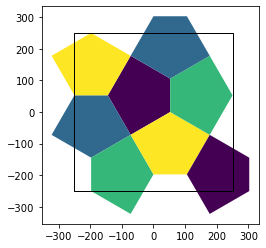

In [10]:
x = d / 2 * (np.sqrt(3) - 1) / 2 / np.sqrt(3)

poly1 = Polygon([
    (-d/2 + x, 0), (-d/4, -d/4), (0, -x), (0, x), (-d/4, d/4)
])
poly1 = translate(poly1, x, x)                                 # a
poly2 = rotate(poly1, 90, origin = poly1.exterior.coords[1])   # b
poly3 = rotate(poly1, 180, origin = poly1.exterior.coords[1])  # c
poly4 = rotate(poly1, 270, origin = poly1.exterior.coords[1])  # d
poly5 = rotate(poly4, 90, origin = poly4.exterior.coords[4])   # a 
poly6 = rotate(poly4, 270, origin = poly4.exterior.coords[4])  # c
poly7 = rotate(poly6, 270, origin = poly6.exterior.coords[1])  # b
poly8 = rotate(poly7, 180, origin = poly7.exterior.coords[4])  # d

tile_unit.elements = geopandas.GeoDataFrame(
    data = {"element_id": list("abcdacbd")}, crs = ak.crs,
    geometry = geopandas.GeoSeries(
        [poly1, poly2, poly3, poly4, poly5, poly6, poly7, poly8]))

ax = tile_unit.elements.plot(column = "element_id", cmap = "viridis")
tile_unit.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")

In [11]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")
t30 = tiling.get_tiled_map(prioritise_tiles = True)

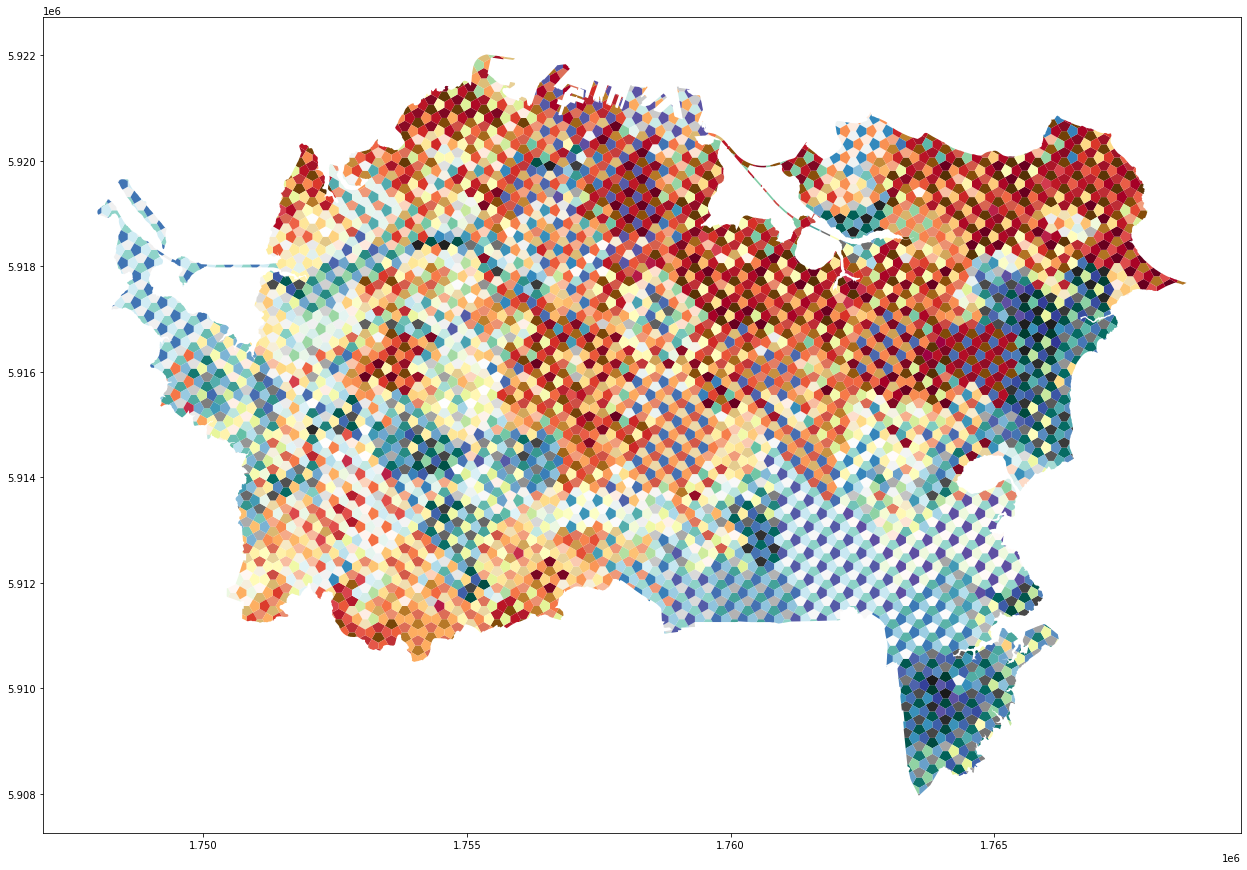

In [12]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(t30.element_id)
cols = [x for x in t30.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr", "viridis")

for strand, col, cmap in zip(strands, cols, cmaps):
    t30[t30.element_id == strand].plot(ax = ax, column = col, cmap = cmap)